In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split

In [3]:
alldata = pd.read_csv('C:/Users/ibezm/Downloads/intro_extra.csv', sep = '\t')

In [4]:
alldata

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,...,Q91E,country,dateload,introelapse,testelapse,surveyelapse,gender,engnat,age,IE
0,5,51,7107,3,91,2522,1,56,6180,2,...,4609,US,2019-02-20 17:35:52,1,461,16,2,1,23,3
1,5,39,6354,5,13,3092,1,12,5243,5,...,10409,AU,2019-02-20 17:46:32,21,467,15,1,2,25,2
2,3,17,5397,4,35,2747,5,40,5262,3,...,2691,BR,2019-02-20 18:10:24,56,306,17,1,2,19,1
3,5,41,3055,2,14,3348,1,13,5141,1,...,3697,CZ,2019-02-20 18:16:21,2,287,14,1,1,23,1
4,1,76,2542,2,54,1878,1,15,5637,1,...,1662,CA,2019-02-20 18:21:49,2,325,12,1,1,18,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7183,1,46,1328,4,82,3214,4,43,3360,5,...,3495,US,2019-08-19 12:54:22,8,299,14,2,1,53,1
7184,2,5,8786,5,24,2233,5,10,10387,5,...,6088,CA,2019-08-19 13:10:30,25,498,20,1,1,20,1
7185,3,29,6618,5,44,2393,4,58,5768,5,...,3425,BY,2019-08-19 13:29:47,3,326,17,2,2,28,1
7186,4,15,8321,2,18,6179,5,60,5037,1,...,17416,CA,2019-08-19 15:19:35,3,414,23,2,1,19,1


In [5]:
columns_to_keep = []
question_columns = []
for i in range(len(alldata.columns)):
    if (('country' not in alldata.columns[i]) and ('dateload' not in alldata.columns[i])):
    ##if ('Q' in alldata.columns[i]) or (alldata.columns[i] == 'IE'):
        columns_to_keep.append(alldata.columns[i])

In [6]:
data = alldata[columns_to_keep]

In [7]:
data

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,...,Q91A,Q91I,Q91E,introelapse,testelapse,surveyelapse,gender,engnat,age,IE
0,5,51,7107,3,91,2522,1,56,6180,2,...,3,35,4609,1,461,16,2,1,23,3
1,5,39,6354,5,13,3092,1,12,5243,5,...,3,1,10409,21,467,15,1,2,25,2
2,3,17,5397,4,35,2747,5,40,5262,3,...,1,19,2691,56,306,17,1,2,19,1
3,5,41,3055,2,14,3348,1,13,5141,1,...,3,23,3697,2,287,14,1,1,23,1
4,1,76,2542,2,54,1878,1,15,5637,1,...,5,69,1662,2,325,12,1,1,18,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7183,1,46,1328,4,82,3214,4,43,3360,5,...,4,62,3495,8,299,14,2,1,53,1
7184,2,5,8786,5,24,2233,5,10,10387,5,...,2,33,6088,25,498,20,1,1,20,1
7185,3,29,6618,5,44,2393,4,58,5768,5,...,1,21,3425,3,326,17,2,2,28,1
7186,4,15,8321,2,18,6179,5,60,5037,1,...,2,86,17416,3,414,23,2,1,19,1


In [22]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier

In [9]:
X = data.drop('IE', axis=1)  
y = data['IE'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [10]:
clf = RandomForestClassifier()

In [20]:
grid_space={'max_depth':[2, 5, None],
              'n_estimators':[10,100,200],
              'max_features':[3,5,10],
              'min_samples_leaf':[2,3,5],
              'min_samples_split':[2,3,5]
           }

grid = GridSearchCV(clf, param_grid=grid_space,cv=3,scoring='accuracy')
model_grid = grid.fit(X,y)

print('Best hyperparameters are: '+str(model_grid.best_params_))
print('Best score is: '+str(model_grid.best_score_))

Best hyperparameters are: {'max_depth': None, 'max_features': 10, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 100}
Best score is: 0.7168892598775738


In [11]:
clf.set_params( max_depth = None, n_estimators = 100, max_features = 10, min_samples_leaf = 3, min_samples_split = 5)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

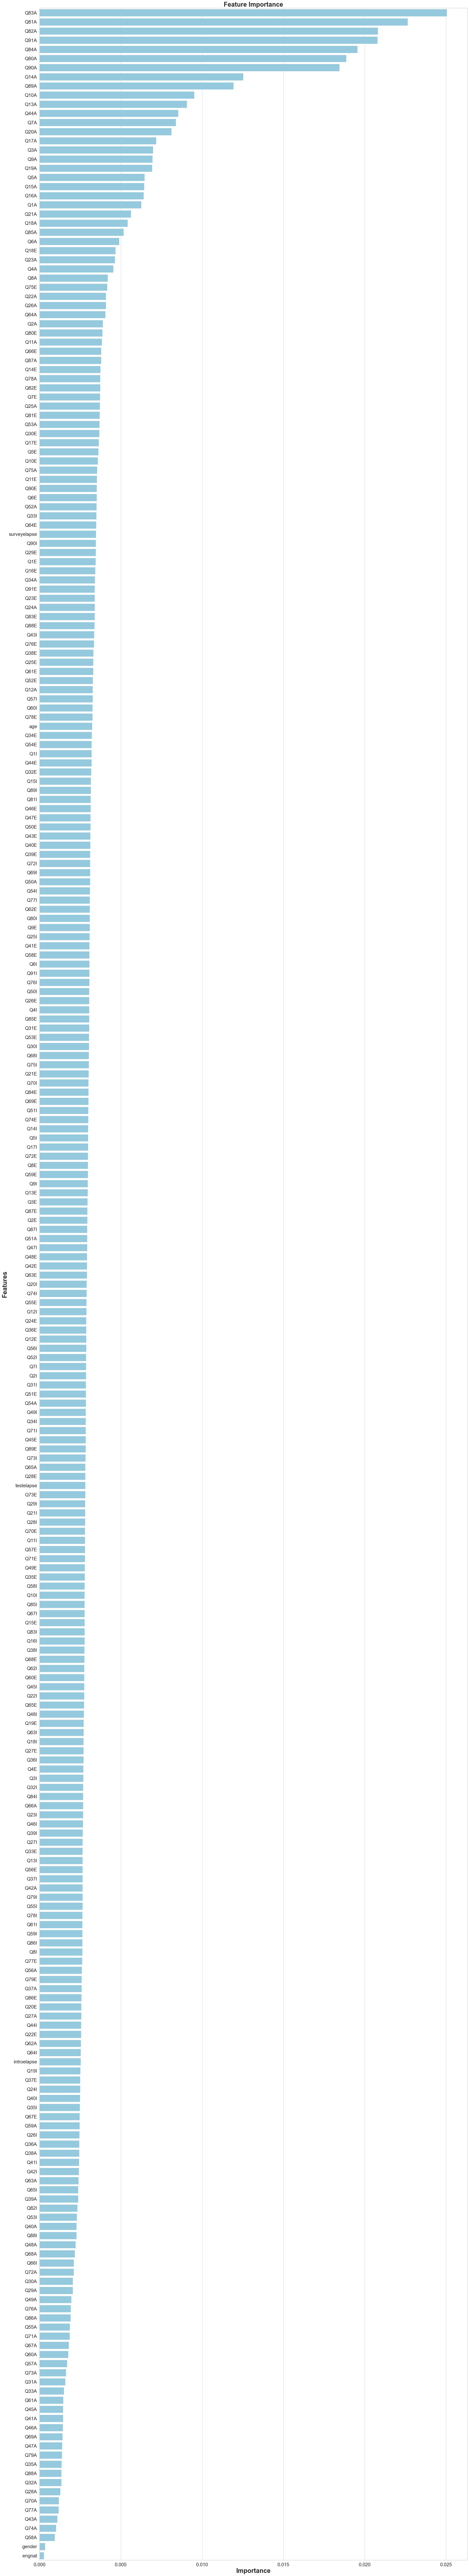

None

,Features,Gini-Importance
0,Q83A,0.025052
1,Q81A,0.022642
2,Q82A,0.020806
3,Q91A,0.020787
4,Q84A,0.019555
...,...,...
274,Q43A,0.001096
275,Q74A,0.001021
276,Q58A,0.000940
277,gender,0.000345


In [12]:
feats = {}
for feature, importance in zip(X.columns, clf.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,180)
sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='skyblue')
plt.xlabel('Importance', fontsize=25, weight = 'bold')
plt.ylabel('Features', fontsize=25, weight = 'bold')
plt.title('Feature Importance', fontsize=25, weight = 'bold')
display(plt.show())
display(importances)

In [13]:
accuracy_score (y_test, y_pred)

0.7222924568057312

In [24]:
cross_validate(clf, X, y)

{'fit_time': array([8.59022546, 6.43766212, 5.73525476, 4.90786195, 5.47870135]),
 'score_time': array([0.10956001, 0.02712846, 0.12525105, 0.04868031, 0.0263114 ]),
 'test_score': array([0.70375522, 0.70445063, 0.71766342, 0.72929715, 0.72581768])}

In [14]:
top_ten = importances.head(10)
top_ten.drop(["Gini-Importance"], axis=1)

,Features
0,Q83A
1,Q81A
2,Q82A
3,Q91A
4,Q84A
5,Q80A
6,Q90A
7,Q14A
8,Q89A
9,Q10A


In [15]:
columns_to_keep = [data["Q91A"], data["Q83A"], data["Q82A"], data["Q90A"], data["Q80A"], data["Q84A"], data["Q81A"], data["Q14A"], data["Q89A"], data["Q13A"], data["IE"]]
cut_data = pd.DataFrame(columns_to_keep)

cut_data = cut_data.transpose()
cut_data

,Q91A,Q83A,Q82A,Q90A,Q80A,Q84A,Q81A,Q14A,Q89A,Q13A,IE
0,3,3,1,3,4,2,2,5,4,3,3
1,3,2,1,4,4,2,2,3,4,3,2
2,1,5,5,1,1,5,5,1,2,4,1
3,3,5,5,3,1,5,5,1,4,2,1
4,5,3,2,5,5,1,3,2,5,5,2
...,...,...,...,...,...,...,...,...,...,...,...
7183,4,3,4,5,1,5,5,2,2,4,1
7184,2,3,3,3,2,5,5,3,1,3,1
7185,1,5,5,1,1,5,5,1,1,2,1
7186,2,4,5,5,5,5,5,1,4,2,1


In [16]:
y = cut_data['IE'] 
X = cut_data.drop('IE', axis=1)  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [18]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [25]:
accuracy_score (y_test, y_pred)

0.7172355667930889

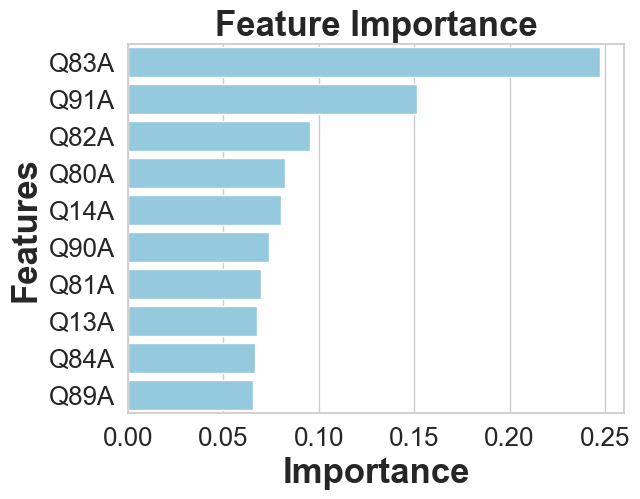

None

,Features,Gini-Importance
0,Q83A,0.247642
1,Q91A,0.151693
2,Q82A,0.095274
3,Q80A,0.082344
4,Q14A,0.080072
5,Q90A,0.073658
6,Q81A,0.069669
7,Q13A,0.067433
8,Q84A,0.066428
9,Q89A,0.065787


In [30]:
feats = {}
for feature, importance in zip(X.columns, clf.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='skyblue')
plt.xlabel('Importance', fontsize=25, weight = 'bold')
plt.ylabel('Features', fontsize=25, weight = 'bold')
plt.title('Feature Importance', fontsize=25, weight = 'bold')
display(plt.show())
display(importances)